In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [6]:
# get Turkey's energy production dataset from epias
start_date = '2020-01-01'
end_date = '2021-01-01'
production = uretim.gerceklesen(start_date, end_date,)

In [10]:
production.shape

(8808, 18)

In [9]:
production.head(5)

,Tarih,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
0,2020-01-01,0,6166.40,3761.62,5780.09,1545.26,7302.54,770.50,0.0,35.5,1157.82,293.65,572.31,396.65,0,0,278.0,28060.34
1,2020-01-01,1,5161.03,3079.97,5792.66,1548.51,7286.46,776.18,0.0,35.8,1164.57,273.78,575.65,392.46,0,0,394.0,26481.07
2,2020-01-01,2,5149.52,2160.79,5755.22,1460.39,7281.67,787.75,0.0,36.3,1167.74,273.78,585.67,390.22,0,0,172.0,25221.05
3,2020-01-01,3,3860.16,2292.47,5793.94,1591.92,7299.57,815.19,0.0,36.6,1168.91,271.57,569.56,392.99,0,0,154.0,24246.88
4,2020-01-01,4,3437.43,2470.96,5626.99,1653.69,7299.74,939.26,0.0,33.0,1167.93,273.78,374.90,401.09,0,0,-13.0,23665.77


In [11]:
production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 0 to 8807
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tarih           8808 non-null   datetime64[ns]
 1   Saat            8808 non-null   int64         
 2   Doğalgaz        8808 non-null   float64       
 3   Barajlı         8808 non-null   float64       
 4   Linyit          8808 non-null   float64       
 5   Akarsu          8808 non-null   float64       
 6   İthal Kömür     8808 non-null   float64       
 7   Rüzgar          8808 non-null   float64       
 8   Güneş           8808 non-null   float64       
 9   Fuel Oil        8808 non-null   float64       
 10  Jeo Termal      8808 non-null   float64       
 11  Asfaltit Kömür  8808 non-null   float64       
 12  Taş Kömür       8808 non-null   float64       
 13  Biyokütle       8808 non-null   float64       
 14  Nafta           8808 non-null   int64         
 15  LNG      

In [12]:
production.columns

Index(['Tarih', 'Saat', 'Doğalgaz', 'Barajlı', 'Linyit', 'Akarsu',
       'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeo Termal',
       'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG',
       'Uluslararası', 'Toplam'],
      dtype='object')

In [13]:
production.describe()

,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
count,8808.00000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.0,8808.0,8808.000000,8808.000000
mean,11.50000,7746.026504,6515.794933,4303.827785,2331.419566,7111.608642,2788.028970,47.980268,35.631681,1061.087693,252.972661,431.470344,463.165296,0.0,0.0,-62.418569,33026.595775
std,6.92258,3952.323549,3171.403680,622.512318,1448.579504,1716.678584,1608.350955,66.317553,3.309019,105.220071,79.484606,158.347459,36.506329,0.0,0.0,315.830842,5495.008940
min,0.00000,496.660000,366.190000,2189.100000,419.440000,992.650000,139.760000,0.000000,0.000000,663.530000,48.570000,167.240000,369.680000,0.0,0.0,-1949.250000,15246.640000
25%,5.75000,3980.625000,3902.125000,3921.495000,1090.195000,6708.195000,1370.720000,0.000000,34.200000,993.385000,211.960000,272.177500,439.615000,0.0,0.0,-313.360000,29067.472500
50%,11.50000,8929.805000,6796.245000,4305.005000,1809.795000,7656.220000,2588.285000,2.670000,36.400000,1089.000000,242.880000,438.840000,458.440000,0.0,0.0,-85.000000,32908.105000
75%,17.25000,11058.337500,9052.125000,4732.692500,3552.550000,8340.122500,4092.695000,93.282500,37.800000,1141.867500,333.390000,598.862500,480.445000,0.0,0.0,182.000000,37484.857500
max,23.00000,14615.630000,15891.780000,6149.070000,5744.500000,8790.980000,6861.040000,297.990000,43.600000,1255.580000,362.100000,692.620000,596.090000,0.0,0.0,789.000000,45210.030000


We are going to use İthal Kömür(coal) as our predictor variable (x) and Doğalgaz (natural gas) as our predictand variable (y)

In [78]:
# 1000 amount of test data to be used
X = production['İthal Kömür'].values.reshape(-1,1)
y = production['Doğalgaz'].values.reshape(-1,1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

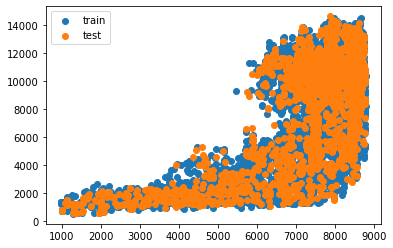

In [80]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()

In [81]:
# launch the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [82]:
print('intercept: ', regressor.intercept_)
print('coeff: ', regressor.coef_)

intercept:  [-3791.32568998]
coeff:  [[1.62304682]]


In [83]:
# make predictions
y_pred = regressor.predict(X_test)

In [84]:
df_pred = pd.DataFrame({'Actual': y_test.flatten(),
                        'Predicted': y_pred.flatten()})

In [85]:
df_pred.head(5)

,Actual,Predicted
0,7534.24,10203.363070
1,3272.59,5118.308686
2,6072.19,9970.228625
3,1200.22,600.135865
4,13304.25,9784.957830


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

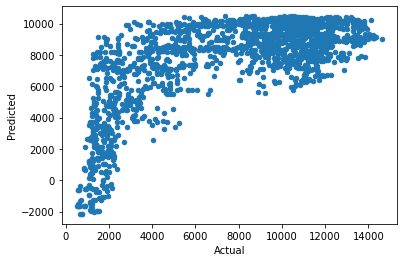

In [86]:
df_pred.plot(x = 'Actual', y='Predicted', kind='scatter')

In [87]:
# The mean squared error
print('Mean squared error is: ', mean_squared_error(df_pred['Actual'], 
                                                    df_pred['Predicted']))

# The mean absolute error
print('Mean absolute error is: ', mean_absolute_error(df_pred['Actual'], 
                                                      df_pred['Predicted']))

# The root mean squared error
print('Root mean squared error is: ', np.sqrt(mean_squared_error(df_pred['Actual'], 
                                                                 df_pred['Predicted'])))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination is: ', r2_score(df_pred['Actual'], 
                                                    df_pred['Predicted']))

Mean squared error is:  8148891.376120101
Mean absolute error is:  2361.513729834004
Root mean squared error is:  2854.6263111167636
Coefficient of determination is:  0.48056397938154627


Seems like there is no linear relation between Natural gas and Coal production

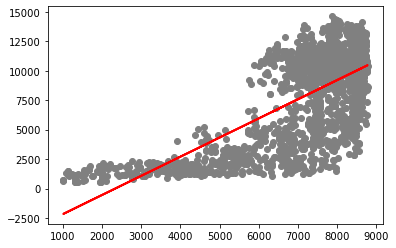

In [90]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color = 'red', lw = 2)

Yarın multiple LR ve ploynomial LR ile devam et yeni notebook ile

 Bir de buranın altına aynı LR 'i statsmodel kütüphanesini kullanarak yap'